<a href="https://colab.research.google.com/github/Guilherme-SSB/Algoritmos-de-Machine-Learning/blob/main/PAE_Processamento_de_Sinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install mpld3
import mpld3
import math
!pip install julian
import julian

In [ ]:
# Diretiva do Notebook para exibição de gráficos inline
%matplotlib inline

# Configuração do tamanho dos gráficos
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_MON_0311519570_20090403T220030_20090702T022757.csv'

df = pd.read_csv(FILE_PATH)

x = df.DATEBARTT.to_numpy()
y = df.WHITEFLUXSYS.to_numpy()

df.head()

,DATEBARTT,WHITEFLUXSYS
0,54925.420601,39541.105
1,54925.426528,39402.080
2,54925.432454,39481.900
3,54925.438381,39582.690
4,54925.444308,39477.324


In [ ]:
# Verificar se tem dados faltando

print(df.isnull().sum())

DATEBARTT       0
WHITEFLUXSYS    0
dtype: int64


Text(0.5, 0, 'Databartt')

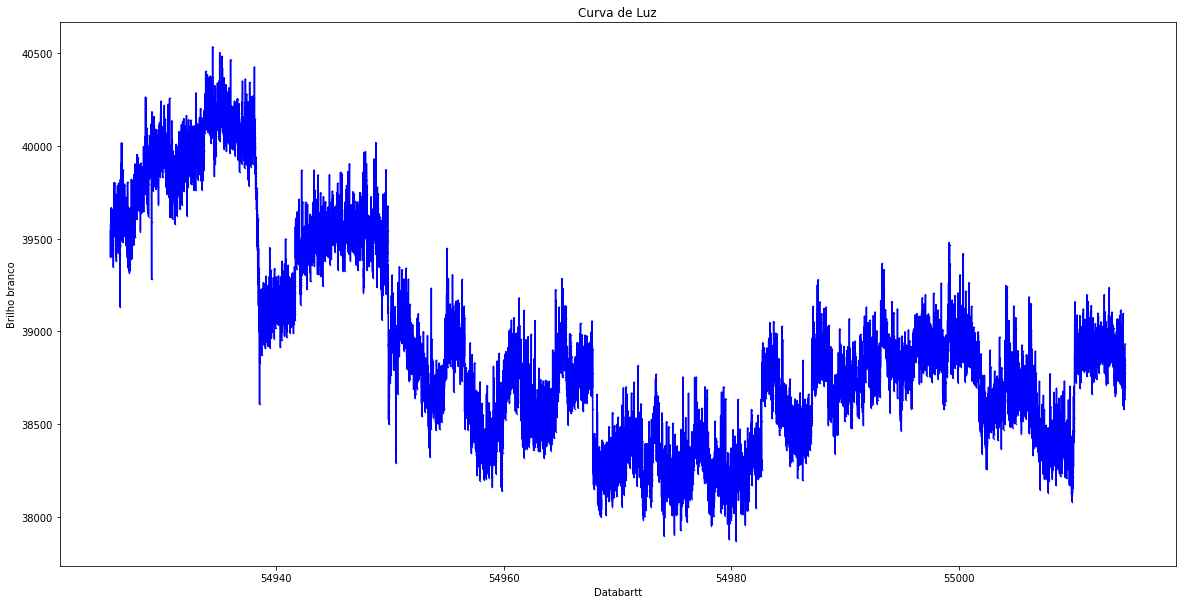

In [ ]:
fig = plt.figure()

plt.plot(x, y, '-b', marker='.', markersize=1)
plt.title('Curva de Luz')
plt.ylabel('Brilho branco')
plt.xlabel('Databartt')

# Criação e exibição de tooltips no gráfico
#mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
#mpld3.display()

In [ ]:
len(y) # 2^14 é o inteiro de base 2 mais proximo

15051

In [ ]:
print("Erro foi de: ",round(100*abs((2**14 - len(y)))/len(y), 2), "%")

Erro foi de:  8.86 %


In [ ]:
n_signal = 1024
n_samples = 8
freq_w_signal = np.linspace(0, 2*math.pi, n_signal)
freq_w_samples = np.linspace(0, 2*math.pi, n_samples + 1)[0:-1]

Text(0.5, 0, 'Frequência')

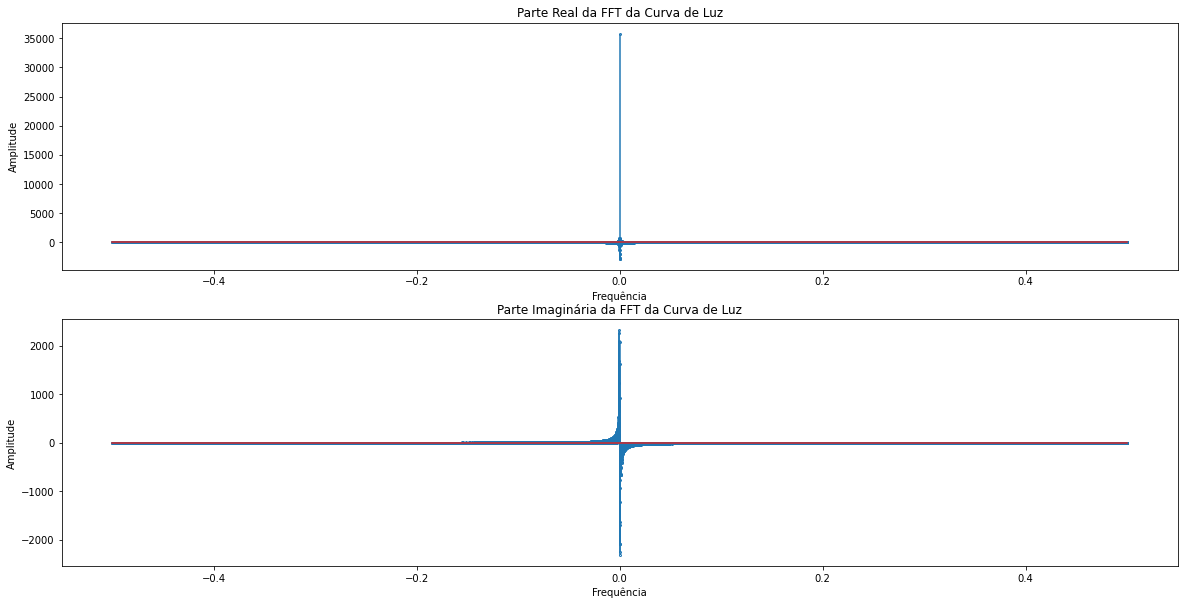

In [ ]:
# Aplicando FFT
## FFT funciona bem melhor com n_samples 2^n, potencia de 2
n_samples = 2**14

fft_y = np.fft.fft(y, n_samples)
freqs_y = np.fft.fftfreq(n_samples)

fft_y_shifted = np.fft.fftshift(fft_y)
freqs_y_shifted = np.fft.fftshift(freqs_y)

fft_y_scaled = fft_y_shifted / n_samples


# Plotando
fig = plt.figure()

# Criação do primeiro subplot
plt.subplot(2, 1, 1)
stem_fft_ex_real = plt.stem(freqs_y_shifted, np.real(fft_y_scaled), use_line_collection=True)
stem_fft_ex_real[0].set_markerfacecolor('none')
stem_fft_ex_real[0].set_markersize(2)
plt.title('Parte Real da FFT da Curva de Luz')
plt.ylabel('Amplitude')
plt.xlabel('Frequência')

# Criação do primeiro subplot
plt.subplot(2, 1, 2)
stem_fft_ex_real = plt.stem(freqs_y_shifted, np.imag(fft_y_scaled), use_line_collection=True)
stem_fft_ex_real[0].set_markerfacecolor('none')
stem_fft_ex_real[0].set_markersize(2)
plt.title('Parte Imaginária da FFT da Curva de Luz')
plt.ylabel('Amplitude')
plt.xlabel('Frequência')

#mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
#mpld3.display()

Text(0.5, 0, 'Databartt')

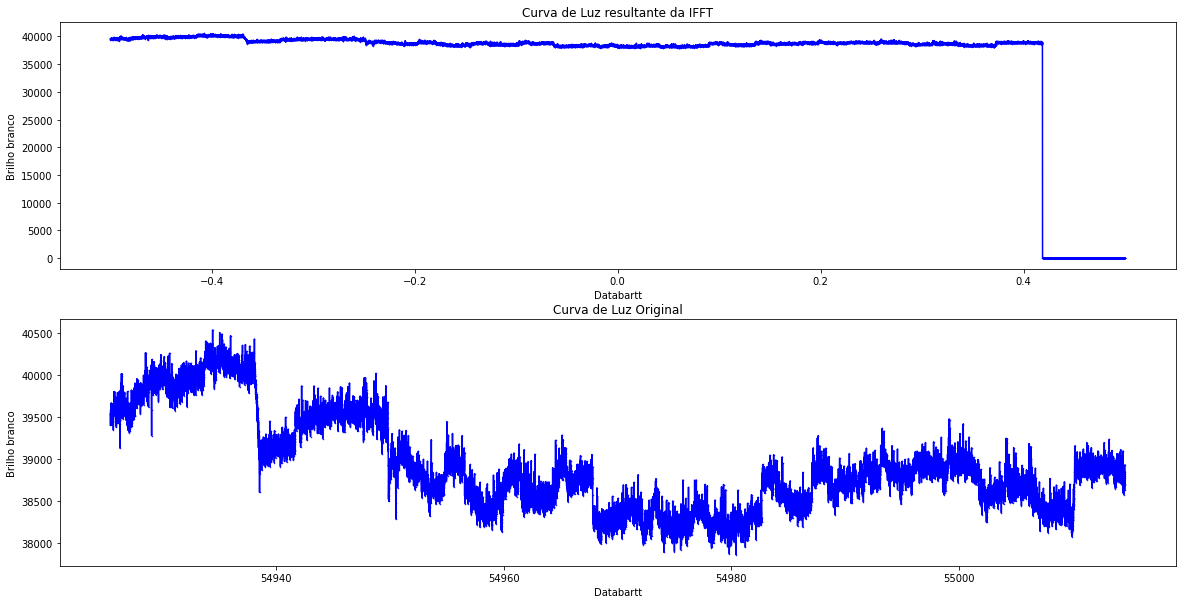

In [ ]:
# Aplicando ifft

ifft_y = np.fft.ifft(fft_y)

fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(freqs_y_shifted, np.real(ifft_y), '-b', marker='.', markersize=1)
plt.title('Curva de Luz resultante da IFFT')
plt.ylabel('Brilho branco')
plt.xlabel('Databartt')

plt.subplot(2, 1, 2)
plt.plot(x, y, '-b', marker='.', markersize=1)
plt.title('Curva de Luz Original')
plt.ylabel('Brilho branco')
plt.xlabel('Databartt')

In [ ]:
MSE = np.square(np.subtract(y[:2**14], np.real(ifft_y))).mean()

print(MSE)

# Ou seja, y = np.real(ifft_y)

# Aula 02

In [ ]:
from scipy.interpolate import interp1d
from scipy import signal
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
filter_order = 4
cutout_freq_hz = 200
sampling_freq_hz = 5000

# Geração dos coeficientes do filtro
filter_coefficients_butterworth = signal.iirfilter(filter_order, cutout_freq_hz, btype='lowpass', analog=False, ftype='butter', fs=sampling_freq_hz, output='ba')

# Geração da resposta em frequencia do filtro
frequency_response_samples = 1024
filter_response_butterworth = signal.freqz(filter_coefficients_butterworth[0], filter_coefficients_butterworth[1], frequency_response_samples, fs=sampling_freq_hz)

# Geração de um degrau unitário
step_time = np.linspace(0, 1, frequency_response_samples, endpoint=False)
step_signal = (1 - signal.square(2*np.pi*step_time)) / 2

# Geração da resposta ao degrau do filtro
step_signal_filtered = signal.lfilter(filter_coefficients_butterworth[0], filter_coefficients_butterworth[1], step_signal)

In [ ]:
fig = plt.figure()

plt.plot(step_time, step_signal, "-g", label='Degrau unitário')
plt.plot(step_time, step_signal_filtered, "-b", label='Butterworth')
plt.legend()
plt.title('Curva de Luz original')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')

# Criação e exibição de tooltips no gráfico
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
mpld3.display()

In [ ]:
filter_order = 2
cutout_freq_hz = 25
sampling_freq_hz = 1500

filter_coefficients_butterworth = signal.iirfilter(filter_order, cutout_freq_hz, btype='lowpass', analog=False, ftype='butter', fs=sampling_freq_hz, output='ba')

frequency_response_samples = len(y)

filter_response_butterworth = signal.freqz(filter_coefficients_butterworth[0], filter_coefficients_butterworth[1], frequency_response_samples, fs=sampling_freq_hz)

step_time = x
step_signal = y

step_signal_filtered = signal.lfilter(filter_coefficients_butterworth[0], filter_coefficients_butterworth[1], step_signal)

fig = go.Figure()

fig.add_trace(go.Scatter(x=step_time[70:], y=step_signal[70:],
                           mode='lines',
                           name='Original Light Curve'))

fig.add_trace(go.Scatter(x=step_time[70:], y=step_signal_filtered[70:],
                           mode='lines',
                           name='Light Curve Filtered'))

fig.update_layout(title='Light Curve before and after the Butterworth filter',
                   xaxis_title='Databartt',
                   yaxis_title='Whiteflux')

fig.show()